In [152]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [153]:
data = pd.read_csv('/content/Labeled_Data_2022.csv')

In [154]:
data

,SenderSubId,orderId,Account,Symbol,ordStatus,side,OrderQty,Price,LastShares,LastPx,lastMkt,TransactTime,timeStamp,MsgSeqNum,Cancelled,target
0,JTSTMA2,7E53360-3-5,3J1AP14E,QYOU,NEW,BUY,5000.000000,0.205000,0,0.0,CDX,5/24/2018 7:00:51 AM,2018-05-24 07:25:39.107,18,0,0
1,JTSTMA2,7E53361-4-5,3J1AP14E,ROE,NEW,SELL,10000.000000,0.275000,0,0.0,CDX,5/24/2018 7:00:52 AM,2018-05-24 07:25:39.107,19,0,0
2,JTSTMA2,7E53362-2-5,3J1AP14E,PAC,NEW,BUY,4000.000000,0.600000,0,0.0,CDX,5/24/2018 7:00:56 AM,2018-05-24 07:25:39.107,20,0,0
3,JTSTMA2,7E53363-3-5,3J1AP14E,PAC,NEW,SELL,500.000000,0.740000,0,0.0,CDX,5/24/2018 7:01:02 AM,2018-05-24 07:25:39.107,21,0,0
4,JTSTMA2,7E53364-4-5,3J1AP14E,DELX,NEW,BUY,3000.000000,0.690000,0,0.0,CDX,5/24/2018 7:01:04 AM,2018-05-24 07:25:39.107,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,JTOWTDA,14477,3J1AL93L,IPA,NEW,Sell,2792.548579,0.975243,0,0.0,PTX,2018-05-24 10:15:02 AM,2018-05-24 10:15:02.483,884134,0,1
9855,JTOWTDA,14478,3J1AL93L,IPA,NEW,Sell,2792.548579,0.975243,0,0.0,PTX,2018-05-24 10:15:02 AM,2018-05-24 10:15:02.484,884135,0,1
9856,JTOWTDA,14479,3J1AL93L,IPA,NEW,Sell,2792.548579,0.975243,0,0.0,PTX,2018-05-24 10:15:02 AM,2018-05-24 10:15:02.485,884136,0,1
9857,JTOWTDA,14480,3J1AL93L,IPA,NEW,Sell,2792.548579,0.975243,0,0.0,PTX,2018-05-24 10:15:02 AM,2018-05-24 10:15:02.486,884137,0,1


In [155]:
data.shape

(9859, 16)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   9859 non-null   object 
 1   orderId       9859 non-null   object 
 2   Account       9857 non-null   object 
 3   Symbol        9856 non-null   object 
 4   ordStatus     9859 non-null   object 
 5   side          9857 non-null   object 
 6   OrderQty      9803 non-null   float64
 7   Price         9803 non-null   float64
 8   LastShares    9859 non-null   int64  
 9   LastPx        9859 non-null   float64
 10  lastMkt       9859 non-null   object 
 11  TransactTime  9859 non-null   object 
 12  timeStamp     9859 non-null   object 
 13  MsgSeqNum     9859 non-null   int64  
 14  Cancelled     9859 non-null   int64  
 15  target        9859 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [157]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQty,9803.0,10504.273958,164432.630051,10.0,800.000000,2792.548579,2792.548579,1.475900e+07
Price,9803.0,33.614612,950.064686,0.0,0.975243,0.975243,20.556144,7.643204e+04
LastShares,9859.0,11.422355,399.498777,0.0,0.000000,0.000000,0.000000,2.900000e+04
LastPx,9859.0,0.176961,3.132547,0.0,0.000000,0.000000,0.000000,9.171000e+01
MsgSeqNum,9859.0,704779.257430,273167.018496,3.0,729754.500000,879209.000000,881673.500000,8.841380e+05
Cancelled,9859.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
target,9859.0,0.603915,0.489107,0.0,0.000000,1.000000,1.000000,1.000000e+00


In [158]:
#See if we have NAN values 
#if it displays False means there is no NAN values
#If it displays True, means there is a NAN values
data. isna(). any()

SenderSubId     False
orderId         False
Account          True
Symbol           True
ordStatus       False
side             True
OrderQty         True
Price            True
LastShares      False
LastPx          False
lastMkt         False
TransactTime    False
timeStamp       False
MsgSeqNum       False
Cancelled       False
target          False
dtype: bool

In [159]:
data.dropna(inplace=True)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9797 entries, 0 to 9858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   9797 non-null   object 
 1   orderId       9797 non-null   object 
 2   Account       9797 non-null   object 
 3   Symbol        9797 non-null   object 
 4   ordStatus     9797 non-null   object 
 5   side          9797 non-null   object 
 6   OrderQty      9797 non-null   float64
 7   Price         9797 non-null   float64
 8   LastShares    9797 non-null   int64  
 9   LastPx        9797 non-null   float64
 10  lastMkt       9797 non-null   object 
 11  TransactTime  9797 non-null   object 
 12  timeStamp     9797 non-null   object 
 13  MsgSeqNum     9797 non-null   int64  
 14  Cancelled     9797 non-null   int64  
 15  target        9797 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 1.3+ MB


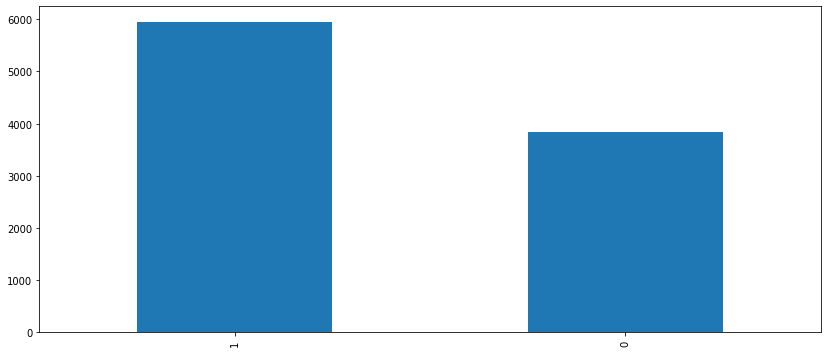

In [161]:
ax=data['target'].value_counts().plot(kind='bar',figsize=(14,6))

In [162]:
#our Label
data.target.value_counts(normalize=True)*100

1    60.753292
0    39.246708
Name: target, dtype: float64

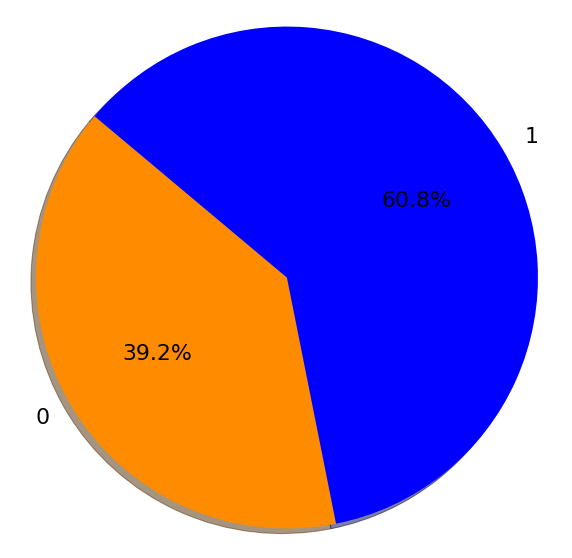

In [163]:
target=[0,1]
sizes = [ len(data[data['target']==0]), 
         len(data[data['target']==1])]
        
colors = ['darkorange','blue']
explode = ( 0, 0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=target, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [164]:
#Re-check 
data. isna(). any()

SenderSubId     False
orderId         False
Account         False
Symbol          False
ordStatus       False
side            False
OrderQty        False
Price           False
LastShares      False
LastPx          False
lastMkt         False
TransactTime    False
timeStamp       False
MsgSeqNum       False
Cancelled       False
target          False
dtype: bool

# **Remove the unused columns**

In [165]:
del data['Symbol']
del data['ordStatus']
del data ['LastShares']
del data ['LastPx']
del data ['lastMkt']
del data ['timeStamp']
del data ['MsgSeqNum']
del data['Cancelled']

In [166]:
data

,SenderSubId,orderId,Account,side,OrderQty,Price,TransactTime,target
0,JTSTMA2,7E53360-3-5,3J1AP14E,BUY,5000.000000,0.205000,5/24/2018 7:00:51 AM,0
1,JTSTMA2,7E53361-4-5,3J1AP14E,SELL,10000.000000,0.275000,5/24/2018 7:00:52 AM,0
2,JTSTMA2,7E53362-2-5,3J1AP14E,BUY,4000.000000,0.600000,5/24/2018 7:00:56 AM,0
3,JTSTMA2,7E53363-3-5,3J1AP14E,SELL,500.000000,0.740000,5/24/2018 7:01:02 AM,0
4,JTSTMA2,7E53364-4-5,3J1AP14E,BUY,3000.000000,0.690000,5/24/2018 7:01:04 AM,0
...,...,...,...,...,...,...,...,...
9854,JTOWTDA,14477,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1
9855,JTOWTDA,14478,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1
9856,JTOWTDA,14479,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1
9857,JTOWTDA,14480,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1


In [167]:
data.shape

(9797, 8)

In [168]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQty,9797.0,10510.115059,164482.809433,10.0,800.000000,2792.548579,2792.548579,1.475900e+07
Price,9797.0,32.717507,946.256356,0.0,0.975243,0.975243,20.556144,7.643204e+04
target,9797.0,0.607533,0.488325,0.0,0.000000,1.000000,1.000000,1.000000e+00


In [169]:
data['Price'].describe()

count     9797.000000
mean        32.717507
std        946.256356
min          0.000000
25%          0.975243
50%          0.975243
75%         20.556144
max      76432.045000
Name: Price, dtype: float64

In [170]:
#Finds the Maximum value in each column
data.max() 

SenderSubId                  QJREGVV
orderId            IRESS_01MjE0Pqd|O
Account                     E3J1AP14
side                            Sell
OrderQty                  14759000.0
Price                      76432.045
TransactTime    5/24/2018 9:57:45 AM
target                             1
dtype: object

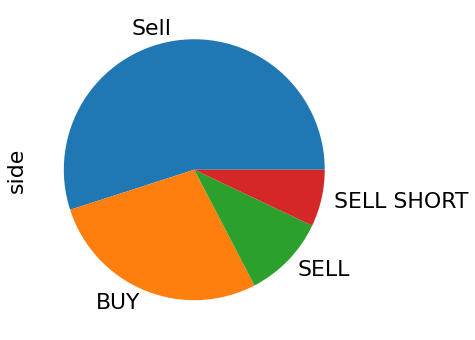

In [171]:
#show the different side : Buy, Sell short, Sell and SELL
data['side'].value_counts().plot(kind='pie', figsize=(10,6))

In [172]:
#Convert side to a numerical value
def side_to_numeric(x):
        if x=='Sell': return 0
        if x=='BUY':  return 1
        if x=='SELL':  return 0
        if x=='SELL SHORT':  return -1

In [173]:
data['Side_numerical']=data['side'].apply(side_to_numeric)

In [174]:
data

,SenderSubId,orderId,Account,side,OrderQty,Price,TransactTime,target,Side_numerical
0,JTSTMA2,7E53360-3-5,3J1AP14E,BUY,5000.000000,0.205000,5/24/2018 7:00:51 AM,0,1
1,JTSTMA2,7E53361-4-5,3J1AP14E,SELL,10000.000000,0.275000,5/24/2018 7:00:52 AM,0,0
2,JTSTMA2,7E53362-2-5,3J1AP14E,BUY,4000.000000,0.600000,5/24/2018 7:00:56 AM,0,1
3,JTSTMA2,7E53363-3-5,3J1AP14E,SELL,500.000000,0.740000,5/24/2018 7:01:02 AM,0,0
4,JTSTMA2,7E53364-4-5,3J1AP14E,BUY,3000.000000,0.690000,5/24/2018 7:01:04 AM,0,1
...,...,...,...,...,...,...,...,...,...
9854,JTOWTDA,14477,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1,0
9855,JTOWTDA,14478,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1,0
9856,JTOWTDA,14479,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1,0
9857,JTOWTDA,14480,3J1AL93L,Sell,2792.548579,0.975243,2018-05-24 10:15:02 AM,1,0


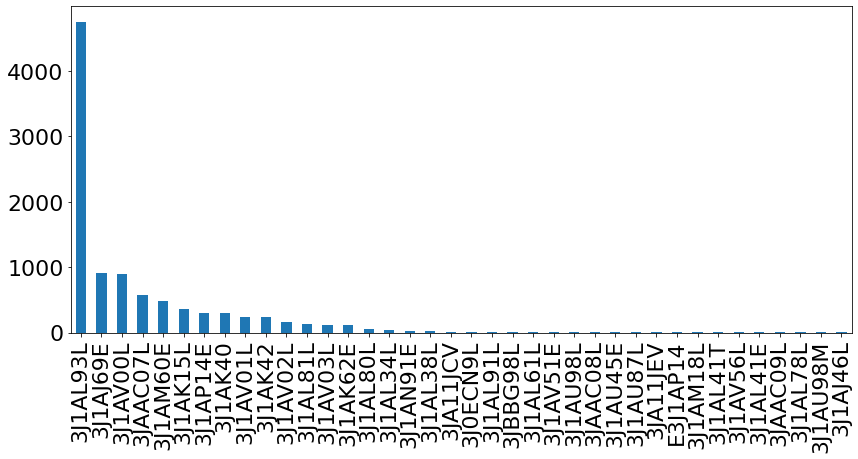

In [175]:
#show the different account 
ax = data['Account'].value_counts().plot(kind='bar', figsize=(14,6))

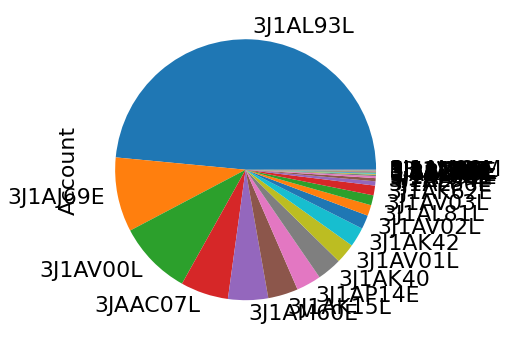

In [176]:
#show the different senders
data['Account'].value_counts().plot(kind='pie', figsize=(10,6))

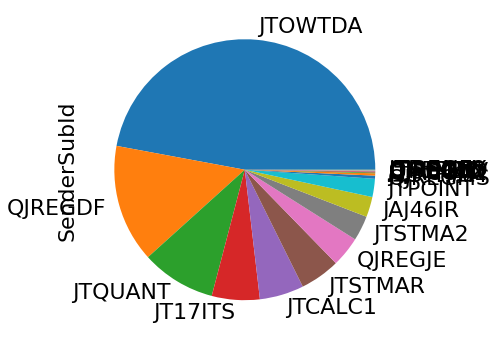

In [177]:
#show the different senders
data['SenderSubId'].value_counts().plot(kind='pie', figsize=(10,6))

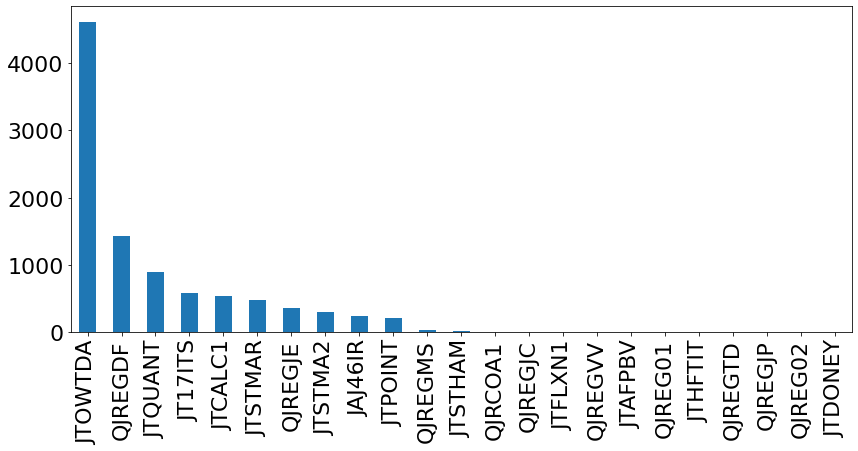

In [178]:
ax = data['SenderSubId'].value_counts().plot(kind='bar', figsize=(14,6))

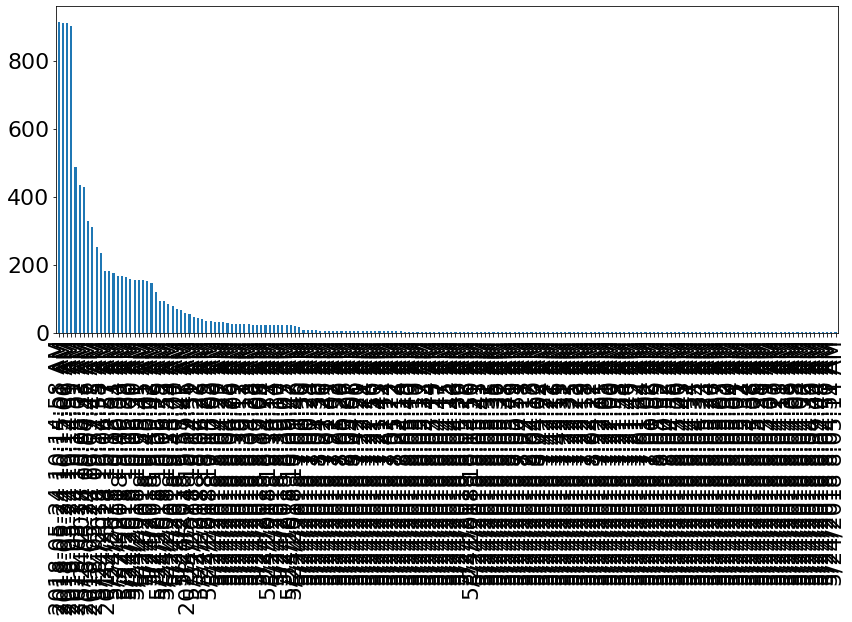

In [179]:
ax = data['TransactTime'].value_counts().plot(kind='bar', figsize=(14,6))

In [180]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()


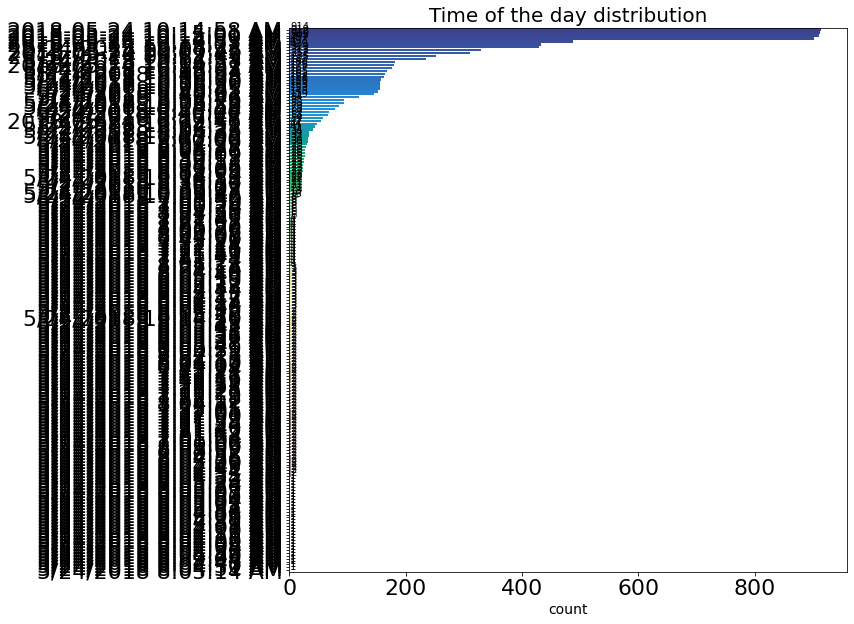

In [181]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


time_tweet_distribution=  data['TransactTime'].value_counts()
drawbarplot(x=time_tweet_distribution.values,y=time_tweet_distribution.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

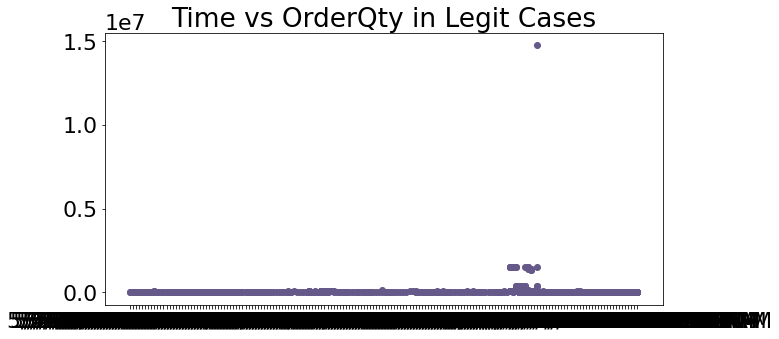

In [182]:
# Time vs OrderQty in Legit Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=data[data['target'] == 0]['TransactTime'], y=data[data['target'] == 0]['OrderQty'], color="#655989")
plt.title("Time vs OrderQty in Legit Cases")
plt.show()

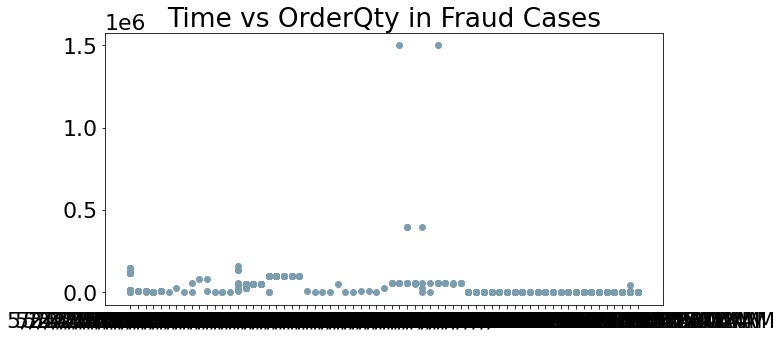

In [183]:
# Time vs OrderQty in Fraud Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=data[data['target'] == 1]['TransactTime'], y=data[data['target'] == 1]['OrderQty'], color="#7a9eaf")
plt.title("Time vs OrderQty in Fraud Cases")
plt.show()

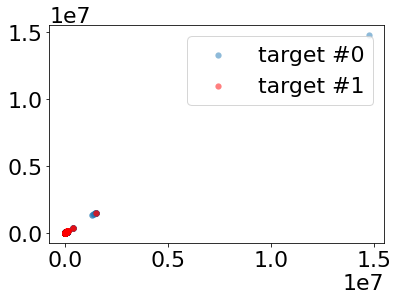

In [184]:
plt.scatter(data.OrderQty[data.target == 0], data.OrderQty[data.target == 0], label="target #0", alpha=0.5, linewidth=0.15)
plt.scatter(data.OrderQty[data.target == 1], data.OrderQty[data.target == 1], label="target #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


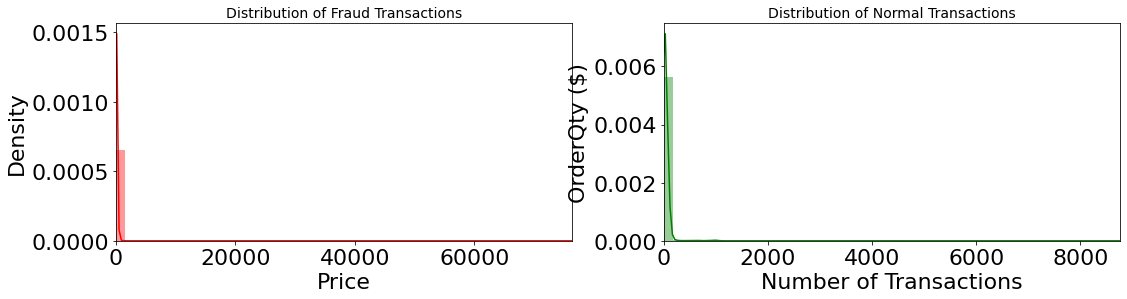

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

fraud_amt = data.Price[data.target == 1]
normal_amt = data.Price[data.target == 0]

sns.distplot(fraud_amt, ax=ax[0], color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlim([min(fraud_amt), max(fraud_amt)])

sns.distplot(normal_amt, ax=ax[1], color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlim([min(normal_amt), max(normal_amt)])

plt.xlabel('Number of Transactions')
plt.ylabel('OrderQty ($)')
plt.show()

In [186]:
#First grouping based on "Team"
# Within each team we are grouping based on "Position"
count = data.groupby(['SenderSubId', 'Side_numerical'])
  
# Print the first value in each group
count.first()

orderId   Account        side  \
SenderSubId Side_numerical                                                   
JAJ46IR      0                                 18094  3J1AL93L        Sell   
             1                     IRESS_01MjE0Pqd|O  3J1AJ46L         BUY   
JT17ITS     -1                                  3164  3JAAC07L  SELL SHORT   
             0                                  2943  3JAAC07L        Sell   
             1                                  2973  3JAAC07L         BUY   
JTAFPBV      0                         7E582C4-10B-5  3J1AU98L        SELL   
             1              132471731-3-5-20180524-E  3J1AU98M         BUY   
JTCALC1     -1                      A052409395906216   3J1AK42  SELL SHORT   
             0                      A052409395806205   3J1AK42        SELL   
             1                      A052409395806202   3J1AK42         BUY   
JTDONEY      0                            1009IFOB.1  3J1AV56L        SELL   
JTFLXN1      0                      0090765S0005Ane1  3JBBG98L        SELL   
             1                      0090773S0000Gne1  3JBBG98L         BUY   
JTHFTIT      1                            <1333414A>  3J1AU45E         BUY   
JTOWTDA     -1                           2zDHW10_0E1  3J1AK62E  SELL SHORT   
             0                             106561171  3J1AK62E        SELL   
             1                             106561171  3J1AK62E         BUY   
JTPOINT     -1                         AWT2-21141-96  3J1AL93L  SELL SHORT   
             0                         AWT2-21208-12  3J1AL93L        SELL   
             1                          AWC6-94041-1  3J1AL91L         BUY   
JTQUANT     -1                           24101678.35  3J1AJ69E  SELL SHORT   
             0                            24116737.0  3J1AJ69E        SELL   
             1                            24116731.1  3J1AJ69E         BUY   
JTSTHAM      0                      00000000003D0000  3J1AN91E        SELL   
JTSTMA2     -1                          7E547C0-22-5  3J1AP14E  SELL SHORT   
             0                           7E53361-4-5  3J1AP14E        SELL   
             1                           7E53360-3-5  3J1AP14E         BUY   
JTSTMAR     -1                          7E54869-C6-5  3J1AM60E  SELL SHORT   
             0                          7E536B7-18-5  3J1AM60E        SELL   
             1                          7E547B6-21-5  3J1AM60E         BUY   
QJRCOA1     -1                           2zDHf10_3Ww  3JAAC08L  SELL SHORT   
             1                           2zDHf10_3jf  3JAAC08L         BUY   
QJREG01      1                          APR1-42845-1  3J1AL61L         BUY   
QJREG02     -1                           2zDHo10_3YT  3JAAC09L  SELL SHORT   
QJREGDF     -1                           788662C25R0  3J1AV00L  SELL SHORT   
             0                           788662C24R0  3J1AV00L        SELL   
             1                            808376C8R0  3J1AV00L         BUY   
QJREGJC      0                          APC1-18622-9  3JA11JCV        SELL   
             1                         APC1-18597-73  3JA11JCV         BUY   
QJREGJE      0                                  7406  3J1AK15L        Sell   
             1                           2zDHd10_2iX  3JA11JEV         BUY   
QJREGJP      0                          AJP9-14114-1  3J1AL78L        SELL   
QJREGMS     -1                           2zDHb10_24u  3J1AL34L  SELL SHORT   
             1                           2zDHb10_24u  3J1AL34L         BUY   
QJREGTD      1                          ATD1-11490-1  3J1AL41E         BUY   
QJREGVV      0                           2zDHi10_4QR  3J1AU87L        SELL   

                                 OrderQty       Price            TransactTime  \
SenderSubId Side_numerical                                                      
JAJ46IR      0                2164.848766   35.077333  2018-05-24 10:14:51 AM   
             1                 200.000000   76.150000   5

In [187]:
#Count the number of transactions for each investor
data.groupby('SenderSubId')['orderId'].count()


SenderSubId
JAJ46IR     246
JT17ITS     581
JTAFPBV       4
JTCALC1     537
JTDONEY       1
JTFLXN1       4
JTHFTIT       2
JTOWTDA    4612
JTPOINT     220
JTQUANT     904
JTSTHAM      28
JTSTMA2     303
JTSTMAR     486
QJRCOA1      10
QJREG01       4
QJREG02       1
QJREGDF    1432
QJREGJC      10
QJREGJE     367
QJREGJP       1
QJREGMS      38
QJREGTD       2
QJREGVV       4
Name: orderId, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


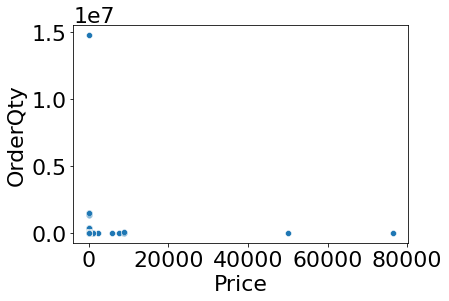

In [188]:
sns.scatterplot(data['Price'], data['OrderQty'])

In [189]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


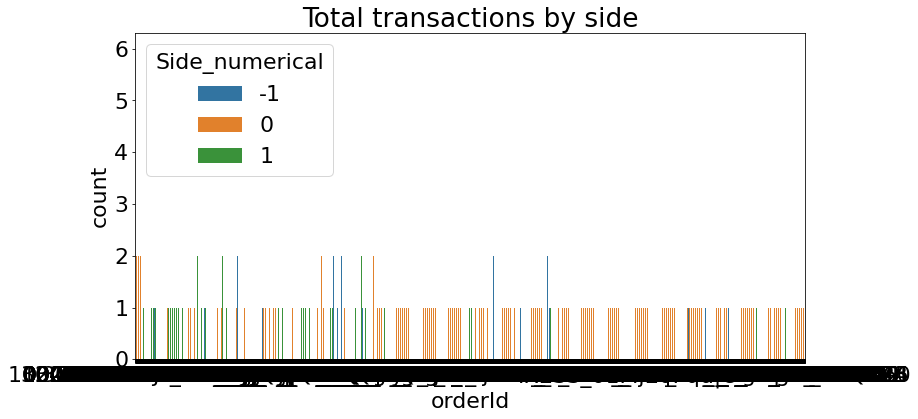

In [190]:
plt.figure(figsize=(12, 6))
plt.title('Total transactions by side')
sns.countplot(data['orderId'], hue = data.Side_numerical)

Text(0.5, 1.0, 'Quantities distributions per seconds')

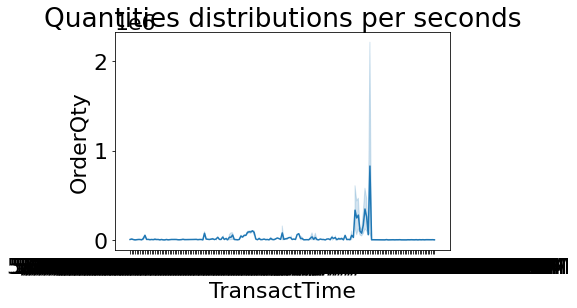

In [191]:
sns.lineplot(x="TransactTime",  y = 'OrderQty',data=data ).set_title("Quantities distributions per seconds")

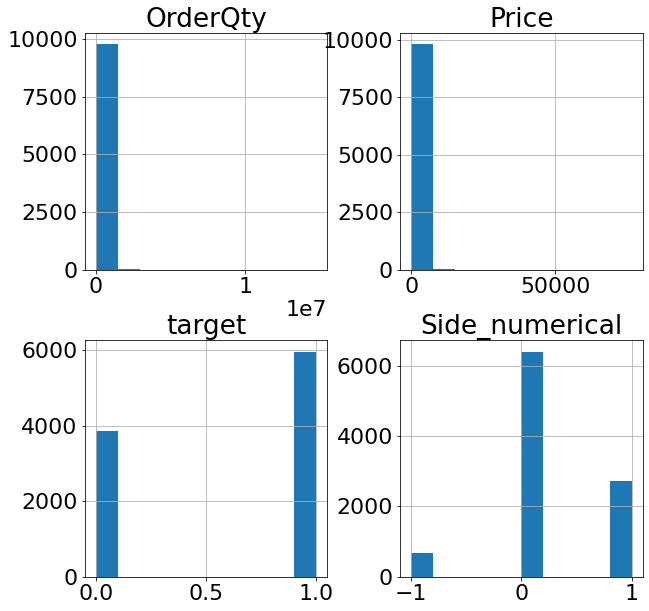

In [192]:
#histogram of the data set

data.hist(figsize=(10,10))
plt.show()

In [193]:
data["SenderSubId"] = data["SenderSubId"].astype('category')
data["orderId"] = data["orderId"].astype('category')
data["side"] = data["side"].astype('category')
data["OrderQty"] = data["OrderQty"].astype('category')
data["Price"] = data["Price"].astype('category')
data["target"] = data["target"].astype('category')

In [194]:
data["SenderSubId_num"] = data["SenderSubId"].cat.codes
data["orderId_num"] = data["orderId"].cat.codes
data["side_num"] = data["side"].cat.codes
data["orderQty_num"] =data["OrderQty"].cat.codes
data["Price_num"] =data["Price"].cat.codes
data["target_num"] =data["target"].cat.codes

In [195]:
df=data[['SenderSubId_num','orderId_num','side_num','orderQty_num','Price_num', 'target_num']].copy()

In [196]:
cols_to_scale = ['SenderSubId_num','orderId_num','side_num','orderQty_num','Price_num','target_num']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [197]:
df

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num,target_num
0,0.500000,0.800798,0.000000,0.575269,0.025049,0.0
1,0.500000,0.800908,0.333333,0.704301,0.033619,0.0
2,0.500000,0.801019,0.000000,0.537634,0.063942,0.0
3,0.500000,0.801130,0.333333,0.182796,0.071852,0.0
4,0.500000,0.801241,0.000000,0.483871,0.069216,0.0
...,...,...,...,...,...,...
9854,0.318182,0.500443,1.000000,0.467742,0.083718,1.0
9855,0.318182,0.500554,1.000000,0.467742,0.083718,1.0
9856,0.318182,0.500665,1.000000,0.467742,0.083718,1.0
9857,0.318182,0.500776,1.000000,0.467742,0.083718,1.0


# **Exploratory Analysis**

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

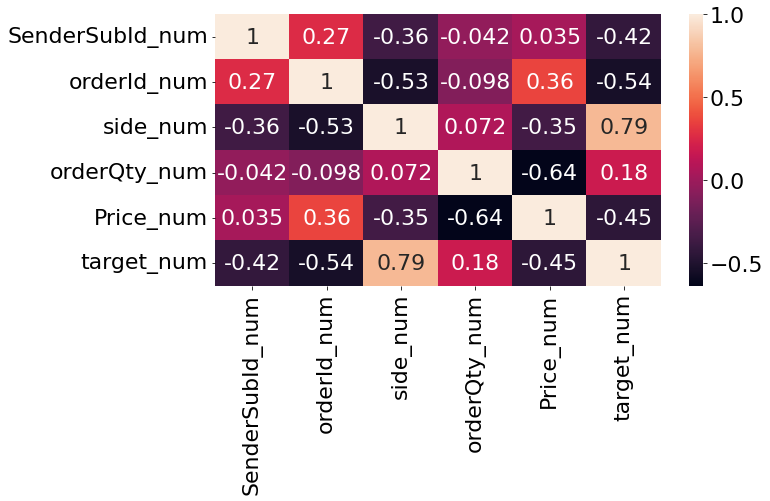

In [199]:
# checking for heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [200]:
#correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.corr(method ='pearson')

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num,target_num
SenderSubId_num,1.000000,0.267753,-0.362027,-0.042091,0.034813,-0.420593
orderId_num,0.267753,1.000000,-0.525499,-0.097628,0.360553,-0.538516
side_num,-0.362027,-0.525499,1.000000,0.072013,-0.353957,0.788049
orderQty_num,-0.042091,-0.097628,0.072013,1.000000,-0.640616,0.184682
Price_num,0.034813,0.360553,-0.353957,-0.640616,1.000000,-0.447165
target_num,-0.420593,-0.538516,0.788049,0.184682,-0.447165,1.000000


# **Models**

In [201]:
#import Libraries for all the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics


from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [202]:
#import Libraries for all the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics


from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score


In [203]:
df

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num,target_num
0,0.500000,0.800798,0.000000,0.575269,0.025049,0.0
1,0.500000,0.800908,0.333333,0.704301,0.033619,0.0
2,0.500000,0.801019,0.000000,0.537634,0.063942,0.0
3,0.500000,0.801130,0.333333,0.182796,0.071852,0.0
4,0.500000,0.801241,0.000000,0.483871,0.069216,0.0
...,...,...,...,...,...,...
9854,0.318182,0.500443,1.000000,0.467742,0.083718,1.0
9855,0.318182,0.500554,1.000000,0.467742,0.083718,1.0
9856,0.318182,0.500665,1.000000,0.467742,0.083718,1.0
9857,0.318182,0.500776,1.000000,0.467742,0.083718,1.0


In [204]:
X_train = df.drop(['target_num'], axis=1)
y_train = df[['target_num']]
print(X_train.shape)
print(y_train.shape)

(9797, 5)
(9797, 1)


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [206]:
df

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num,target_num
0,0.500000,0.800798,0.000000,0.575269,0.025049,0.0
1,0.500000,0.800908,0.333333,0.704301,0.033619,0.0
2,0.500000,0.801019,0.000000,0.537634,0.063942,0.0
3,0.500000,0.801130,0.333333,0.182796,0.071852,0.0
4,0.500000,0.801241,0.000000,0.483871,0.069216,0.0
...,...,...,...,...,...,...
9854,0.318182,0.500443,1.000000,0.467742,0.083718,1.0
9855,0.318182,0.500554,1.000000,0.467742,0.083718,1.0
9856,0.318182,0.500665,1.000000,0.467742,0.083718,1.0
9857,0.318182,0.500776,1.000000,0.467742,0.083718,1.0


# **KNN**

In [207]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

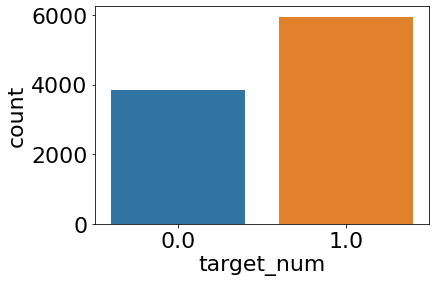

In [208]:
#visualize the target class 'target_num'
sns.countplot(x='target_num', data=df)

In [209]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [210]:
y_pred_knn=knn_model.predict(X_test)

In [211]:
print(accuracy_score(y_test,y_pred_knn))

0.9586734693877551


In [212]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       765
         1.0       0.98      0.95      0.97      1195

    accuracy                           0.96      1960
   macro avg       0.95      0.96      0.96      1960
weighted avg       0.96      0.96      0.96      1960



In [213]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred_knn)))

F1 Score: 0.9656050955414013


In [214]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred_knn)))

Recall score: 0.9514644351464435


In [215]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred_knn)))

Precision score: 0.9801724137931035


Text(0.5, 5.0, 'Predicted Label')

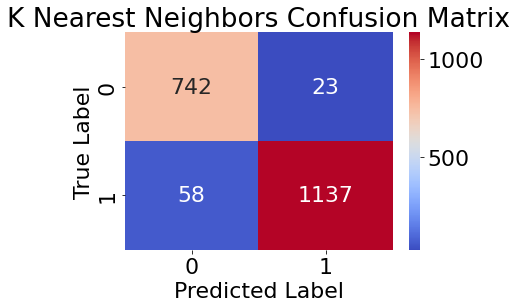

In [216]:
# confusion matrix
knn_cm = confusion_matrix(y_test,y_pred_knn)

ax = sns.heatmap(knn_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('K Nearest Neighbors Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **SVM**

In [217]:
#Let's try the Support Vector Machine algorithm.

#Now, for support vector machines, we need to train the model after scaling the features. Let's first do that.
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

In [218]:
mms = MinMaxScaler()

In [219]:
# Select features and target 
X = df[['SenderSubId_num','orderId_num','side_num','orderQty_num','Price_num']]
y = df['target_num']

In [220]:
X.head()

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num
0,0.5,0.800798,0.000000,0.575269,0.025049
1,0.5,0.800908,0.333333,0.704301,0.033619
2,0.5,0.801019,0.000000,0.537634,0.063942
3,0.5,0.801130,0.333333,0.182796,0.071852
4,0.5,0.801241,0.000000,0.483871,0.069216


In [221]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9854    1.0
9855    1.0
9856    1.0
9857    1.0
9858    0.0
Name: target_num, Length: 9797, dtype: float64

In [222]:
from sklearn.svm import SVC

In [223]:
SVM1= svm.SVC(C=1, kernel= 'poly', random_state= 42)

In [224]:
#Fit into Model
SVM1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='poly', random_state=42)

In [225]:
#Predict the class using X_test
predictions_SVM = SVM1.predict(X_test)

In [226]:
con_mat = confusion_matrix(y_test, predictions_SVM)
average_precision = average_precision_score(y_test, predictions_SVM)
cls_report = classification_report(y_test, predictions_SVM)

In [227]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,predictions_SVM))
#precision score
print("precision:", metrics.precision_score(y_test,predictions_SVM))
#recall score
print("recall" , metrics.recall_score(y_test,predictions_SVM))
print(metrics.classification_report(y_test, predictions_SVM))

acuracy: 0.9331632653061225
precision: 0.9944237918215614
recall 0.895397489539749
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       765
         1.0       0.99      0.90      0.94      1195

    accuracy                           0.93      1960
   macro avg       0.93      0.94      0.93      1960
weighted avg       0.94      0.93      0.93      1960



In [228]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,predictions_SVM)))

F1 Score: 0.9423161602818142


In [229]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,predictions_SVM)))

Precision score: 0.9944237918215614


In [230]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,predictions_SVM)))

Recall score: 0.895397489539749


Text(0.5, 5.0, 'Predicted Label')

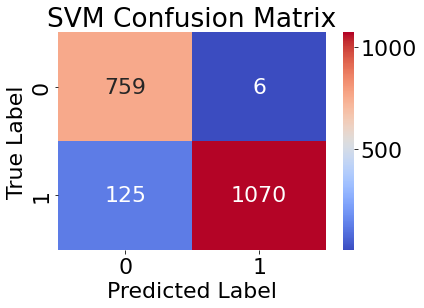

In [231]:
# confusion matrix
cm = confusion_matrix(y_test,predictions_SVM)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('SVM Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **Decision Tree**

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [233]:
X.head()

,SenderSubId_num,orderId_num,side_num,orderQty_num,Price_num
0,0.5,0.800798,0.000000,0.575269,0.025049
1,0.5,0.800908,0.333333,0.704301,0.033619
2,0.5,0.801019,0.000000,0.537634,0.063942
3,0.5,0.801130,0.333333,0.182796,0.071852
4,0.5,0.801241,0.000000,0.483871,0.069216


In [234]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target_num, dtype: float64

In [235]:
X_train.shape

(7837, 5)

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [237]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=3) 

In [238]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [239]:
DT_pred = DT_model.predict(X_test)

In [240]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,DT_pred)

0.9433673469387756

In [241]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,DT_pred)))

Recall score: 0.9138075313807531


In [242]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,DT_pred)))

F1 Score: 0.9516339869281045


In [243]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,DT_pred)))

Precision score: 0.9927272727272727


Text(0.5, 5.0, 'Predicted Label')

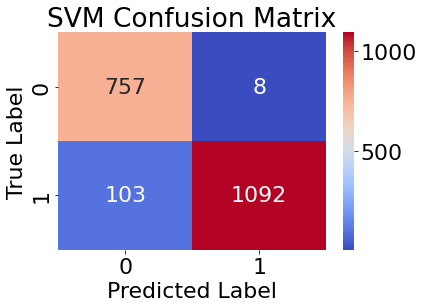

In [244]:
# confusion matrix
cm = confusion_matrix(y_test,DT_pred)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('SVM Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **XGBoost**

In [245]:
from xgboost import XGBClassifier # XGBoost algorithm

In [246]:
xgb = XGBClassifier(max_depth = 10)

In [247]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=10)

In [248]:
xgb_yhat = xgb.predict(X_test)

In [249]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, xgb_yhat))

Accuracy: 0.9658163265306122


In [250]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,xgb_yhat)))

F1 Score: 0.9714041826717883


In [251]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,xgb_yhat)))

Recall score: 0.9523012552301255


In [252]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,xgb_yhat)))

Precision score: 0.9912891986062717


In [285]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,xgb_yhat))
#precision score
print("precision:", metrics.precision_score(y_test,xgb_yhat))
#recall score
print("recall" , metrics.recall_score(y_test,xgb_yhat))
print(metrics.classification_report(y_test, xgb_yhat))

acuracy: 0.9658163265306122
precision: 0.9912891986062717
recall 0.9523012552301255
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       765
         1.0       0.99      0.95      0.97      1195

    accuracy                           0.97      1960
   macro avg       0.96      0.97      0.96      1960
weighted avg       0.97      0.97      0.97      1960



Text(0.5, 5.0, 'Predicted Label')

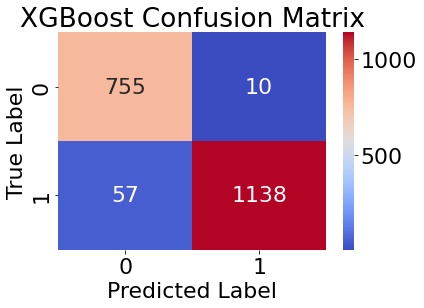

In [253]:
# confusion matrix
cm = confusion_matrix(y_test,xgb_yhat)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('XGBoost Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **Random Forest Classifier**

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [255]:
from sklearn.metrics import plot_confusion_matrix

In [256]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [257]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=10)

In [258]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=10)

In [259]:
y_pred_random=clf.predict(X_test)

In [260]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy: 0.960204081632653


In [261]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred_random)))

F1 Score: 0.9667519181585678


In [262]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred_random)))

Recall score: 0.9489539748953975


In [263]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred_random)))

Precision score: 0.9852302345786272


Text(0.5, 5.0, 'Predicted Label')

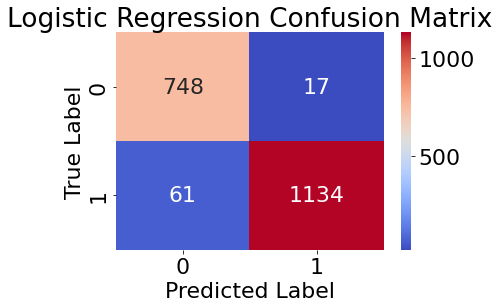

In [264]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_random)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **Logistic Regression**

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
lg = LogisticRegression()

In [267]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [268]:
pred_logReg = lg.predict(X_test)

In [269]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,pred_logReg)

0.9081632653061225

In [270]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,pred_logReg)))

F1 Score: 0.9233390119250424


In [271]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,pred_logReg)))

Recall score: 0.907112970711297


In [272]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,pred_logReg)))

Precision score: 0.9401561144839549


# **Artificial Neural Network ANN**

In [273]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [274]:
callbacks= [
            
            EarlyStopping(monitor='accuracy', patience=20, verbose=1)
           ]

In [275]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 5,kernel_regularizer=regularizers.l2(0.1)))

# Adding the second hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the third hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the output layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.1)))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Fitting the ANN to the Training set
result= classifier.fit(X_train, y_train, batch_size = 8, callbacks=callbacks, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
980/980 [==============================] - 3s 2ms/step - loss: 0.6787 - accuracy: 0.6064 - val_loss: 0.6711 - val_accuracy: 0.6097
Epoch 2/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6711 - accuracy: 0.6070 - val_loss: 0.6694 - val_accuracy: 0.6097
Epoch 3/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6704 - accuracy: 0.6070 - val_loss: 0.6691 - val_accuracy: 0.6097
Epoch 4/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6703 - accuracy: 0.6070 - val_loss: 0.6690 - val_accuracy: 0.6097
Epoch 5/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6702 - accuracy: 0.6070 - val_loss: 0.6690 - val_accuracy: 0.6097
Epoch 6/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6702 - accuracy: 0.6070 - val_loss: 0.6690 - val_accuracy: 0.6097
Epoch 7/100
980/980 [==============================] - 2s 2ms/step - loss: 0.6702 - accuracy: 0.6070 - val_loss: 0.6689 - val_accuracy: 0.6097

In [276]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_test)
y_pred = (y_pred_ANN > 0.5)

In [277]:
score = classifier.evaluate(X_test, y_test)
score

62/62 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6097


[0.6689186692237854, 0.6096938848495483]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


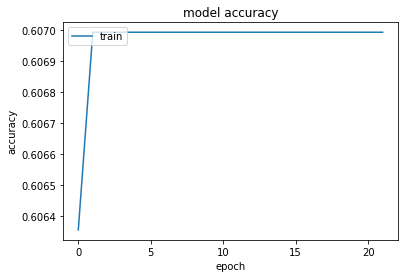

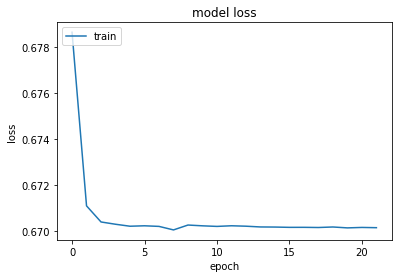

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(result.history.keys())
# summarize history for accuracy
plt.plot(result.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [279]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [280]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,  765],
       [   0, 1195]])

Text(0.5, 15.0, 'Predicted Label')

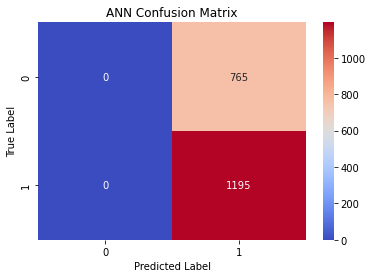

In [281]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('ANN Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/

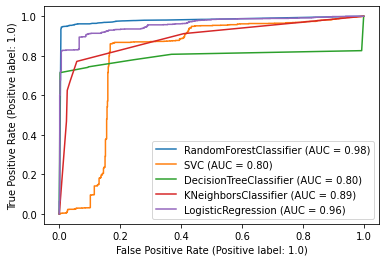

In [287]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(clf,X_test, y_test)
plot_roc_curve(SVM1, X_test, y_test, ax=disp.ax_);
plot_roc_curve(DT_model, X_test, y_test,ax=disp.ax_);
plot_roc_curve(knn_model, X_test, y_test,ax=disp.ax_);
plot_roc_curve(lg, X_test, y_test,ax=disp.ax_);
